In [19]:
import os
import numpy as np
import pandas as pd
summary_file = os.path.join(                            "210615_w_param_tuning_summary.xlsx"
                           )

In [20]:
summary_df = pd.read_excel(summary_file,
                           engine='openpyxl',
                           header=1)
summary_df

,Model Score,xgboost,Dense,LS,LS w/ COSA FW,LS w/ naïve FW,Combined (dense & LS) mean,Combined (dense & LS w/ COSA FW) mean,Combined (dense & LS w/ naive FW) mean,xgboost.1,Dense.1,LS.1,LS w/ COSA FW.1,LS w/ naïve FW.1,Combined (dense & LS) mean.1,Combined (dense & LS w/ COSA FW) mean.1,Combined (dense & LS w/ naive FW) mean.1,Combined (dense & LS) stacked,Combined (dense & LS w/ COSA FW) stacked,Combined (dense & LS w/ naive FW) stacked
0,very_toxic,0.818,0.861,0.895,0.855,0.896,0.881,0.870,0.878,0.787312,0.807452,0.807922,0.804193,0.815415,0.807452,0.807452,0.807452,0.809627,0.808102,0.805948
1,nontoxic,0.865,0.868,0.861,0.853,0.870,0.866,0.867,0.868,0.870301,0.854506,0.847988,0.846973,0.852546,0.854506,0.854506,0.854506,0.852074,0.855458,0.852266
2,LD50_mgkg,0.643,0.643,0.658,0.627,0.663,0.670,0.684,0.676,0.642464,0.645666,0.649640,0.630647,0.650199,0.645666,0.645666,0.645666,0.650257,0.645663,0.650988
3,EPA_category,0.843,0.808,0.806,0.791,0.800,0.813,0.808,0.816,0.835436,0.830823,0.833085,0.814389,0.826235,0.830823,0.830823,0.830823,0.837347,0.831575,0.832211
4,GHS_category,0.841,0.773,0.783,0.751,0.781,0.786,0.781,0.788,0.838024,0.830051,0.827999,0.814714,0.829799,0.830051,0.830051,0.830051,0.829001,0.829735,0.828788


In [21]:
dense_stacked = pd.read_csv(
                 "210615_dense_20foldCV.csv"
                )
xgboost_stacked = pd.read_csv(
                 "210615_xgboost_20foldCV.csv")
combined_stacked = pd.read_csv(
"210615_Combined_LSwFW_ones_stacked_20foldCV.csv")

xgboost_stacked['Model'] = "Xgboost; Stacked"
combined_stacked['Model']="Combined (dense & LS w/ naive FW); Stacked"

In [22]:
to_plot = pd.concat([
#     dense_stacked.query("Metric=='Model Score'"),
    xgboost_stacked.query("Metric=='Model Score'"),
    combined_stacked.query("Metric=='Model Score'")
                    ])

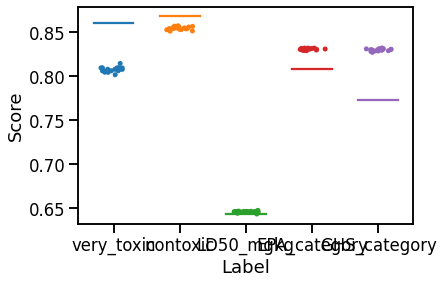

In [23]:
import seaborn as sns
ax = sns.stripplot(
    data=dense_stacked.query("Metric=='Model Score'"),
    x="Label",
    y="Score",
    size=5, 
    jitter=0.2
)
d=0.3
a=summary_df["Dense"]
for i in range(5):
    ax.plot([i-d,i+d], [a[i]]*2)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'very_toxic'),
  Text(1, 0, 'nontoxic'),
  Text(2, 0, 'LD50_mgkg'),
  Text(3, 0, 'EPA_category'),
  Text(4, 0, 'GHS_category')])

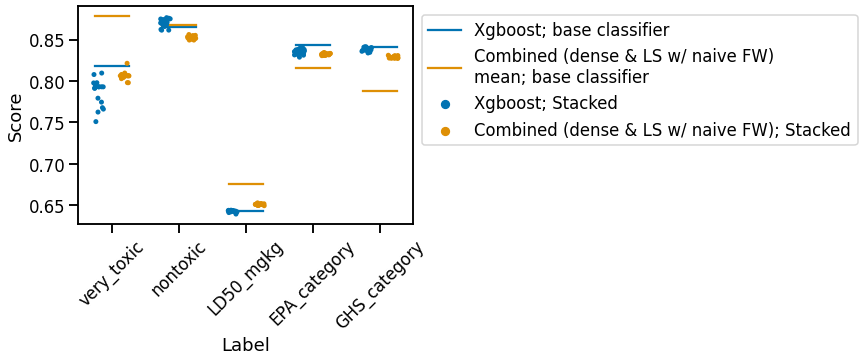

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")

ax = sns.stripplot(
    data=to_plot,
    x="Label",
    y="Score",
    hue = "Model",
    dodge=True,
    size=5, 
    jitter=0.15,
    palette='colorblind'
)
d=0.25
cols = sns.color_palette("colorblind")
mdls = [#'Dense', 
    'xgboost', 'Combined (dense & LS w/ naive FW) mean']
mdl_names = ['Xgboost', 'Combined (dense & LS w/ naive FW) \nmean']
for idx, mdl in enumerate(mdls):
    arr = summary_df[mdl]
    for i in range(5):
        ax.plot([i-d,i+d], [arr[i]]*2, c=cols[idx],
                label=str(mdl_names[idx])+"; base classifier"
               )
leg,hdl = ax.get_legend_handles_labels()
ind = [0,5,10,11]
ax.legend(np.array(leg)[ind], 
          np.array(hdl)[ind],
          bbox_to_anchor=(1,1)
         )
plt.xticks(rotation=45)


Does xgboost have an innate ability to learn from label dependencies?